In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pathlib
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import shutil
import os
import math

In [2]:
batch_size = 64 #was 24
img_height = 128 #100
img_width = 128 #100

In [9]:
dest = 'C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\new_images_classified_only_100\\'
train = dest + 'train'
val = dest + 'val'
test = dest + 'test'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 10,#was 20
        shear_range = 0.2, #was 0.4
        zoom_range = 0.2, #was 0.4
        width_shift_range = 0.1, #was 0.2
        height_shift_range = 0.1, #was 0.2
        horizontal_flip = True,
        vertical_flip = True)
    
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train,
                                                     target_size = (img_width, img_height),
                                                     batch_size = batch_size,
                                                     class_mode = 'categorical',
                                                     #color_mode="rgba"
                                                     )

val_set = test_datagen.flow_from_directory(val,
                                                target_size = (img_width, img_height),
                                                batch_size = batch_size,
                                                class_mode = 'categorical',
                                                #color_mode="rgba"
                                               )

test_set = test_datagen.flow_from_directory(test,
                                                target_size = (img_width, img_height),
                                                batch_size = batch_size,
                                                class_mode = 'categorical',
                                                shuffle = False,
                                                #color_mode="rgba"
                                                )

Found 4822 images belonging to 18 classes.
Found 595 images belonging to 18 classes.
Found 619 images belonging to 18 classes.


In [ ]:
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   pkmonclassifieddir,
#   validation_split=0.2,
#   subset="training",
#   label_mode='categorical',
#   seed=101,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   pkmonclassifieddir,
#   validation_split=0.2,
#   subset="validation",
#   label_mode='categorical',
#   seed=101,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [14]:
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [ ]:
num_classes = 18
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(100,100,3)))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.5)) #was 0.33

model.add(layers.Conv2D(64, (5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(64, (5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization(axis=-1))

# model.add(layers.Conv2D(64, (5, 5), padding="same", activation='relu'))
# model.add(layers.BatchNormalization(axis=-1))
# model.add(layers.Conv2D(64, (5, 5), padding="same", activation='relu'))
# model.add(layers.BatchNormalization(axis=-1))


model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (5, 5), padding="same", activation="relu"))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Conv2D(128, (5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization(axis=-1))

# model.add(layers.Conv2D(128, (5, 5), padding="same", activation='relu'))
# model.add(layers.BatchNormalization(axis=-1))
# model.add(layers.Conv2D(128, (5, 5), padding="same", activation='relu'))
# model.add(layers.BatchNormalization(axis=-1))


model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu')) #was 1024
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax'))

In [ ]:
num_classes = 18
model = Sequential()
model.add(Conv2D(100, (3, 3),
                          padding = 'same',
                          input_shape = (img_width, img_height, 3),
                          activation = 'relu'))
    #classifier.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5)) #was 0.25

model.add(Conv2D(100, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5)) #was 0.25

# flatten output and create fully connected layers
model.add(Flatten())
model.add(Dense(400, input_dim = 4, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(num_classes, activation = 'softmax'))

In [15]:
model = tf.keras.models.load_model('PokemonClassifier2best.h5')

In [16]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(label_smoothing=0.25), #was 0.25 label_smoothing=0.25
  metrics=['accuracy'])

In [ ]:
with tf.device("/device:GPU:0"):
  model.fit(
    training_set,
    validation_data=val_set,
    epochs=400,
    callbacks=[early_stop]
  )

Epoch 1/400
76/76 [==============================] - 20s 254ms/step - loss: 2.0020 - accuracy: 0.6141 - val_loss: 2.1073 - val_accuracy: 0.5311
Epoch 2/400
76/76 [==============================] - 19s 255ms/step - loss: 2.0051 - accuracy: 0.6153 - val_loss: 2.0821 - val_accuracy: 0.5546
Epoch 3/400
76/76 [==============================] - 19s 250ms/step - loss: 2.0085 - accuracy: 0.6139 - val_loss: 2.1035 - val_accuracy: 0.5462
Epoch 4/400
76/76 [==============================] - 19s 254ms/step - loss: 2.0069 - accuracy: 0.6049 - val_loss: 2.0902 - val_accuracy: 0.5580
Epoch 5/400
76/76 [==============================] - 19s 250ms/step - loss: 1.9944 - accuracy: 0.6221 - val_loss: 2.0836 - val_accuracy: 0.5697
Epoch 6/400
76/76 [==============================] - 19s 250ms/step - loss: 2.0064 - accuracy: 0.6201 - val_loss: 2.0785 - val_accuracy: 0.5546
Epoch 7/400
76/76 [==============================] - 19s 250ms/step - loss: 1.9933 - accuracy: 0.6178 - val_loss: 2.0913 - val_accuracy:

In [ ]:
#model.save('/content/drive/MyDrive/PokemonClassifier3.h5')

In [ ]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

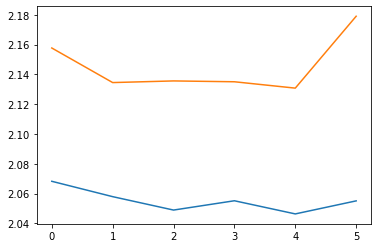

In [ ]:
plt.plot(loss)
plt.plot(val_loss)

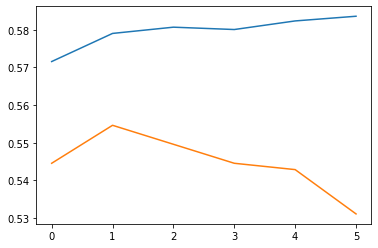

In [ ]:
plt.plot(accuracy)
plt.plot(val_accuracy)

In [17]:
predictions = model.predict(test_set)

In [18]:
for i in range(len(predictions)):
  max = 0
  for j in range(len(predictions[i])):
    if max < predictions[i][j]:
      max = predictions[i][j]
  predictions[i] = predictions[i] == max

In [19]:
number_of_examples = len(test_set.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_set[i][1]))

In [40]:
label_predictions = np.where(predictions)[1]
actual_labels = np.where(test_labels)[1]

In [41]:
typedict = {0:'Bug',1:'Dark',2:'Dragon',3:'Electric',4:'Fairy',5:'Fighting',6:'Fire',7:'Flying',8:'Ghost',9:'Grass',10:'Ground',11:'Ice',12:'Normal',13:'Poison',14:'Psychic',15:'Rock',16:'Steel',17:'Water'}
output = pd.DataFrame()
output['predictions'] = label_predictions
output['actual'] = actual_labels
output['predictions'] = output['predictions'].map(typedict)
output['actual'] = output['actual'].map(typedict)
comparison_column = np.where(output["actual"] == output["predictions"], True, False)
output['equal'] = comparison_column

In [43]:
output['equal'].value_counts()

True     496
False    123
Name: equal, dtype: int64

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        42
           1       0.84      0.91      0.87        23
           2       0.83      0.62      0.71        24
           3       0.94      0.78      0.85        40
           4       0.91      0.71      0.80        14
           5       0.72      0.86      0.78        21
           6       0.78      0.76      0.77        46
           7       1.00      1.00      1.00         2
           8       0.75      0.88      0.81        17
           9       0.91      0.94      0.92        51
          10       0.81      0.68      0.74        25
          11       0.90      0.64      0.75        14
          12       0.86      0.88      0.87        85
          13       0.83      0.65      0.73        23
          14       0.76      0.98      0.86        49
          15       0.71      0.75      0.73        36
          16       0.57      0.71      0.63        17
          17       0.74    

In [27]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        42
           1       0.84      0.91      0.87        23
           2       0.83      0.62      0.71        24
           3       0.94      0.78      0.85        40
           4       0.91      0.71      0.80        14
           5       0.72      0.86      0.78        21
           6       0.78      0.76      0.77        46
           7       1.00      1.00      1.00         2
           8       0.75      0.88      0.81        17
           9       0.91      0.94      0.92        51
          10       0.81      0.68      0.74        25
          11       0.90      0.64      0.75        14
          12       0.86      0.88      0.87        85
          13       0.83      0.65      0.73        23
          14       0.76      0.98      0.86        49
          15       0.71      0.75      0.73        36
          16       0.57      0.71      0.63        17
          17       0.74    

In [61]:
from PIL import Image
from skimage import transform
np_image = Image.open('C:\\Users\\Asrra\\OneDrive\\Documents\\Code\\Python\\Pokemon Classification\\new_images_classified_only_100\\test\\Normal\\Ambipom99.jpg')
np_image = np.array(np_image).astype('float32')/255
np_image = transform.resize(np_image, (128, 128, 3))
np_image = np.expand_dims(np_image, axis=0)
model.predict_classes(np_image)

array([12], dtype=int64)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 42, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        1